## Instructions
- See deadline on the course web page
- This problem set is performed individually. See examination rules on the course web page.
- Students are allowed to discuss together and help each other when solving the problems. However, every student must understand and be able to explain his/her submitted solution. Plagiarism is not allowed (submissions will be both manually and automatically monitored).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.
- Note that grading is performed in the teacher's python environment, which is based on the conda `environment.yml` file in the course github repo. Please avoid using additional python modules (such as `plotly`) as this might cause automatic tests to fail.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook and that this part does not raise any `AssertionError`(s). 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [1]:
student={}
# Update the values below. Note the formats.
student['Lastname']='Olsson'  # string
student['Firstname']='Gottfrid' # string
student['CID']='gotols'        # string
student['DOB-year']=2000         # four-digit integer
student['DOB-month']=5          # integer in the range [1, 12]
student['DOB-day']=4             # integer in the range [1, 31]

In [2]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

By changing the below boolean variable `student_self_assessment` to `True` you attest that:
1. All handed in solutions were produced by yourself in the sense that you understand your solutions and should be able to explain and discuss them with a peer or with a teacher.
2. That discussions with your peers are allowed, also concerning approaches to solve the problem sets, but that direct plagiarism is not allowed and that you must reach your own understanding of submitted solutions according to the definition in the previous point.

In [3]:
student_self_assessment = True
# YOUR CODE HERE

In [4]:
assert student_self_assessment == True, 'You must assert the individual solution statements.'

# Problem Set 3
## Basic problems
### Learning from data [TIF285], Chalmers, Fall 2022

Last revised: 26-Sep-2022 by Christian Forssén [christian.forssen@chalmers.se]

In [5]:
import os
# Data files are stored in
DATA_DIR = "DataFiles/"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

## Problem 1: Assigning probabilities for a hundred-sided dice¶
### (2 points)

Consider a ($M=100$) hundred-sided dice (labeled with 1, 2, 3, ..., 100) for which you know 

Case 1. that the mean of a large number of rolls is $\mu_1 = \frac{1}{100}\sum_{i=1}^{100} i$.

Case 2. that the mean of a large number of rolls is $\mu_2=40$ and that the standard deviation is $\sigma_2=25$.

### Task a)
* Use the principle of maximum entropy to assign the probabilities $\{ p_i \}_{i=1}^{100}$ for the outcomes of a dice roll in the two different cases. Employ the method of Lagrange multipliers to derive (analytical) expressions for $p_i$.
* Your expressions might contain (yet undetermined) Lagrange multipliers.
* Use the markdown cell below to perform the analytical derivation and present the results for $p_i$ in case 1 and case 2. Start by writing down the expression for the entropy with the relevant Lagrange-multiplier terms.

*Hint: There are various constraints from the known information: the normalization of the probabilities $\mathcal{N} = \sum_i p_i = 1$ and the mean result $\mu=\sum_i i p_i$. In case 2 there is also a third constraint in the variance $\sigma^2 = \sum_i (i-\mu)^2 p_i$. Set the so called Lebesque measure $m_i = \mathrm{constant}$.*

**GENERAL**

Lagrangian multipliers:

 - function to max: $f(x)$
 - constraint $i$ that are fullfilled by: $g_i(x)=0$

We then have

$
\qquad \qquad L(x, \lambda_0, ..., \lambda_N) = f(x) + \sum_{i=0}^{N} \lambda_i g_i(x).
$

To find the solution, we need all the partial derivatives of $L(x)$ to be zero. That is equal to 

$
\qquad \qquad \vec{\nabla} L(x, \lambda_0, \lambda_1, ..., \lambda_N) = \left(\frac{\partial}{\partial x}, \frac{\partial}{\partial \lambda_0}, \ldots, \frac{\partial}{\partial \lambda_N} \right) L(x, \lambda_0, \lambda_1, ..., \lambda_N)  =\vec{0} \qquad (\mathrm{1})
$

**OUR CASE**

With the function to max being the entropy, we get for case 2 (we do case 2 first and then pick out the parts of case 2 that make up case 1):

$
\qquad \qquad L_2(p_i, \lambda_0, \lambda_1, \lambda_2) = -\sum_i p_i \log{p_i} + \lambda_0 \left( 1 - \sum_i p_i \right) + \lambda_1 \left( \mu_2 - \sum_i i p_i \right) + \lambda_2 \left( \sigma_2^2 - \sum_i (i-\mu_2)^2 p_i \right)
$

where we implicitly mean $\sum_i = \sum_{i=1}^{100}$.
Using (1) and

$
\qquad \qquad \frac{\partial}{\partial p_k} \sum_i \left(p_i \log{p_i} \right) = \sum_i \frac{\partial}{\partial p_k} \left(p_i \log{p_i} \right) = \log{p_k} + 1
$

as well as taking into account that 

$
\qquad \qquad \frac{\partial}{\partial p_k} \sum_i p_i = \sum_i  \frac{\partial }{\partial p_k} p_i = \sum_i \delta_{ik} = 1
$

we get

$
\qquad \qquad \vec{\nabla} L_2(p_i, \lambda_0, \lambda_1, \lambda_2) =
\left[
-(1 + \log{p_i}) + \lambda_0 \left(0 - 1 \right) + \lambda_1 \left(0 - i \right) + \lambda_2 \left( 0  - (i-\mu_2)^2 \right), \\
\qquad \qquad \qquad \qquad \qquad \qquad 0 + \left(1-\sum_i p_i\right) + 0 + 0,\\
\qquad \qquad \qquad \qquad \qquad \qquad 0 + 0 + \left(\mu_2 -\sum_i i p_i\right) + 0, \\
\qquad \qquad \qquad \qquad \qquad \qquad 0 + 0 + 0 + \left(\sigma_2^2 - \sum_i (i-\mu_2)^2 \right)
\right] = \vec{0} = [0, 0, 0, 0]
$
or, equivalently, as the following system of equations for case 2

$
\qquad \qquad \log{p_i} = -(1+\lambda_0) - \lambda_1 i - \lambda_2 (i-\mu_2)^2 \Longrightarrow p_i = \exp{\left(-(1+\lambda_0) - \lambda_1 i - \lambda_2 (i-\mu_2)^2\right)}\\
\qquad \qquad \sum_i p_i = 1 \\
\qquad \qquad \sum_i i p_i = \mu_2 \\
\qquad \qquad \sum_i (i-\mu_2)^2 p_i = \sigma_2^2. 
$

For case 1 we do the exact same thing, but without the $\lambda_2$-constraint. This gives the following system of equations

$
\qquad \qquad \log{p_i} = -(1+\lambda_0) - \lambda_1 i \Longrightarrow p_i = \exp{\left(-(1+\lambda_0) - \lambda_1 i\right)}\\
\qquad \qquad \sum_i p_i = 1 \\
\qquad \qquad \sum_i i p_i = \mu_1.
$

To get $p_i$ we need only exponentiate the first equation in each system of equations, as shown.

We can also ignore the $\lambda_0$ term in each case by making sure that the pdf is normalized (implemented in the code below).


### Task b)
* Determine the still unknown Lagrange multipliers; you can do it numerically.
* Print the values of the Lagrange multipliers for each case (you don't need to print $\lambda_0$, but you should obviously make sure that the probability distribution is properly normalized.
* Assign the probabilities and make a bar plot for each case. Store the probabilities in the arrays `probs_1` and `probs_2`, each of shape (100,).
* Use only modules that are part of the `tif285-env` environment as autograding might otherwise fail.

In [6]:
# importing modules

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats # to test

fun_1_eval [0.]                                                                    <-- this should be (very close to) zero
fun_2_eval [ 2.02504680e-12 -6.19593266e-11]                                       <-- this should be (very close to) zero
moments of pdf case 1: (1.0000000000000009, 50.5, 833.2500000000001)               <-- this should be (1, 50.5, -)
moments of pdf case 2: (1.0000000000000002, 39.999999999997975, 625.000000000062)  <-- this should be (1, 40, 625)

               Case 1            Case 2
------------------------------------------
lambda 1       0.00000           0.01017
lambda 2       -                 0.00030


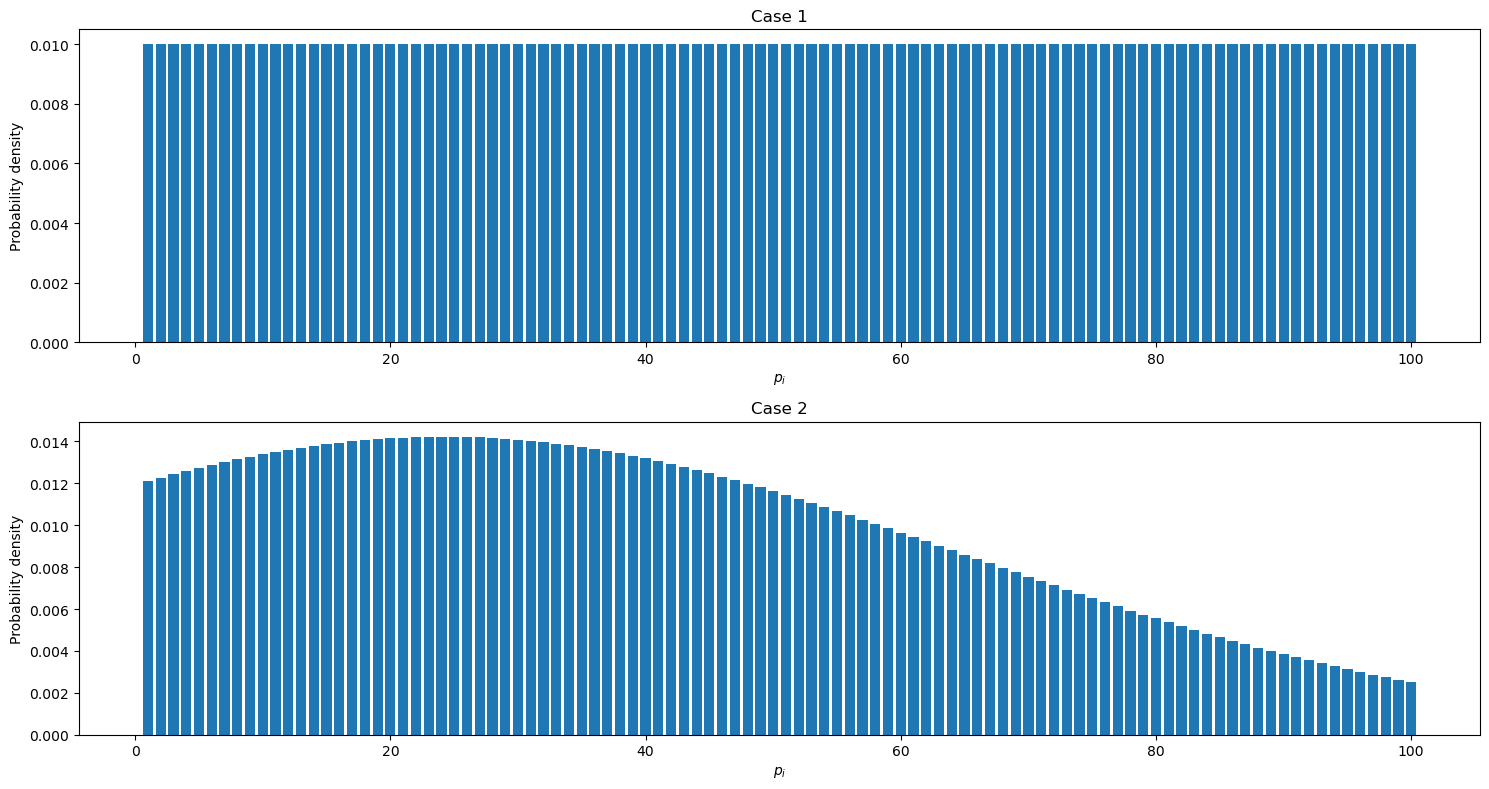

In [7]:
mu_1 = 5050/100  # (1/100)*sum_{i=1}^{100} = 5050/100
mu_2 = 40.0
sigma_2 = 25.0 

def pdf_1(lam, M=100):
    '''
    Returns an array of (normalized) probabilities for a given Lagrange multiplier. Case 1.
    
    Args:
        lam: Lagrange multiplier (float)
        M: number of discrete probabilities (int, default 100)
        
    Returns:
        pdf: Array of shape (M,) of probabilities p_i = f_1(i,lam) / norm
    '''

    # calculate p from Lagrangian multiplier method
    p = []
    for i in range(M):
        p.append( np.exp(-1 - i*lam) )
    
    p = np.array(p)
    
    # normalize
    norm = np.sum(p)
    p = p / norm 
    
    return p #tried some different M's, it seems ok //2022-10-04

    
    
def pdf_2(lam1, lam2, mu=mu_2, M=100):
    '''
    Returns an array of (normalized) probabilities for a given Lagrange multiplier and mean. Case 2.
    
    Args:
        lam1: Lagrange multiplier for the mean constraint (float)
        lam2: Lagrange multiplier for the variance constraint (float)
        mu: mean value (float, default 40.0)
        M: number of discrete probabilities (int)
        
    Returns:
        pdf: Array of shape (M,) of probabilities p_i = f_2(i,lam,mu) / norm
    '''
    
    # calculate p from Lagrangian multiplier method
    p = []
    for i in range(M):
        p.append( np.exp(-1 - i*lam1 - lam2*(i-mu)**2) )
    
    p = np.array(p)
    
    # normalize
    norm = np.sum(p)
    p = p / norm 
    
    return p
    
    
    
def moments(pdf):
    '''
    Returns the first few moments of a discrete pdf.
    
    Args:
        pdf: Array of shape (M,) of probabilities p_i
        
    Returns:
        moments: tuple of floats with the first few moments (norm, mean, variance) 
    '''
    norm, mean, variance = 0, 0, 0
    
    for i, p_i in enumerate(pdf):
        norm += p_i
        mean += (i+1) * p_i
    
    for i, p_i in enumerate(pdf):     
        variance += ((i+1) - mean)**2 * p_i
    
    return norm, mean, variance ##### NEED TO DOUBLE-CHECK THIS

   
# and to use the principle of maximum entropy to assign the probabilities 
Msides = 100
probs_1, probs_2 = np.ones(Msides), np.ones(Msides)
x = np.linspace(1, Msides, Msides) # for bar plot



# CASE 1
def fun_1(lam1):
    pdf = pdf_1(lam1, M=Msides)
    mean = moments(pdf)[1]
    func = mu_1 - mean     # mean constraint (fulfilled when = 0)
    return func

lam1_star_case_1 = scipy.optimize.fsolve(fun_1, 0)
probs_1 = pdf_1(lam1_star_case_1, M=100)
probs_1 = np.reshape(probs_1, (Msides,)) #to ensure right shape



# CASE 2
def fun_2(lams):
    lam1, lam2 = lams[0], lams[1]
    pdf = pdf_2(lam1, lam2, mu=mu_2, M=Msides)
    norm, mean, variance = moments(pdf)
    
    #print(mu_2, mean)
    #print(sigma_2**2, variance)
    func = np.empty(2)
    func[0] = mu_2 - mean           # mean constraint (fulfilled when = 0)
    func[1] = sigma_2**2 - variance # variance constraint (fulfilled when = 0)
    return func


[lam1_star_case_2, lam2_star_case_2] = scipy.optimize.fsolve(fun_2, [0, 0])#, xtol=1e-5)
probs_2 = pdf_2(lam1_star_case_2, lam2_star_case_2, mu=mu_2, M=Msides)
probs_2 = np.reshape(probs_2, (Msides,))

# PRINT TO MAKE SURE CONSTRAINTS ARE FULFILLED
print("fun_1_eval", fun_1(lam1_star_case_1), "                                                                   <-- this should be (very close to) zero")
print("fun_2_eval", fun_2([lam1_star_case_2, lam2_star_case_2]), "                                      <-- this should be (very close to) zero")
print("moments of pdf case 1:", moments(probs_1), "              <-- this should be (1, 50.5, -)")
print("moments of pdf case 2:", moments(probs_2), " <-- this should be (1, 40, 625)")


# PLOT
fig, axs = plt.subplots(2, figsize=(15,8))

axs[0].bar(x, probs_1)
axs[0].set_xlabel("$p_i$")
axs[0].set_ylabel("Probability density")
axs[0].set_title("Case 1")

axs[1].bar(x, probs_2)
axs[1].set_xlabel("$p_i$")
axs[1].set_ylabel("Probability density")
axs[1].set_title("Case 2")

fig.tight_layout()


# OPTIMIZED MULTIPLIERS
print(f"\n               Case 1            Case 2")
print(f"------------------------------------------")
print(f"lambda 1       {lam1_star_case_1[0]:.5f}           {lam1_star_case_2:.5f}")
print(f"lambda 2       -                 {lam2_star_case_2:.5f}")

In [8]:
for iprobs, probs in enumerate([probs_1,probs_2]):
    assert probs.shape == (100,), f'The array `probs` for case {iprobs} should be of shape (100,). probs.shape = {probs.shape}'
    assert np.abs(probs.sum()-1.0)<1e-6, f'The norm of array `probs` for case {iprobs} is {probs.sum}'


## Problem 2: Hypothesis testing using p-values
### (2 points)

Assume that you are analyzing a time series of data from an experiment that is searching for an annual modulation on top of a constant background (e.g. a signal that would be proportional to the flux of dark matter particles which is expected to have an annual modulation). 

The time series of data consists of $N = 20$ measurements that extends over a period of 5 years. The measurements are presented in some re-scaled, dimensionless units. From calibration measurements it is known that errors are statistically distributed with a standard deviation $\sigma = 5.0$.

### Tasks
* Read the data which has been generated using three different (unknown) scenarios: with different amplitudes of the annual modulation signal
* Consider the scenario that the signal is *constant*, with an unknown amplitude, as a null hypothesis.
* Compute, for each case, the chi-squared statistics: $\chi^2 = \sum_{i=1}^N \frac{( y_i - \bar{y} )^2}{\sigma^2}$, where the average value $\bar{y}$ is estimated from the sample $\{ y_i \}_{i=1}^{N}$.
* Make a plot of the expected $\chi^2$ distribution for the relevant number of degrees of freedom and compare with the statistic obtained for the actual data in each case.
* What is the *P-value* or *significance* of the data (for each case) from a frequentist point of view?
* Assume that we have decided beforehand the significance level 5% for this test. Would you *reject the null hypothesis with 95% confidence* for each particular case?

#### Notes:
* Save the p-value in the list variable `pvalue` (see cell below) as numbers between 0 and 1 (i.e., not percent)
* Should the null hypothesis be rejected for any of the three different cases? Save your answer in the list boolean variable `reject_null` (see below).


In [9]:
# importing modules

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chi2
import sklearn

# YOUR CODE HERE

Read data for case  0
Read data for case  1
Read data for case  2
pvalues: [0.49095710361962563, 0.0925977349726802, 0.025691362227545533]
reject_null: [False, False, True]




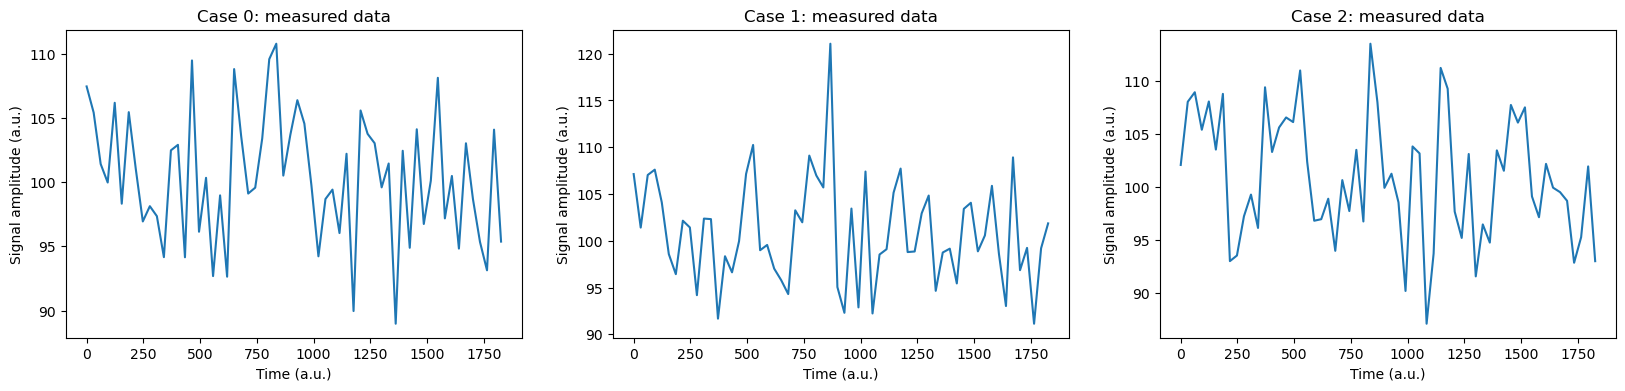

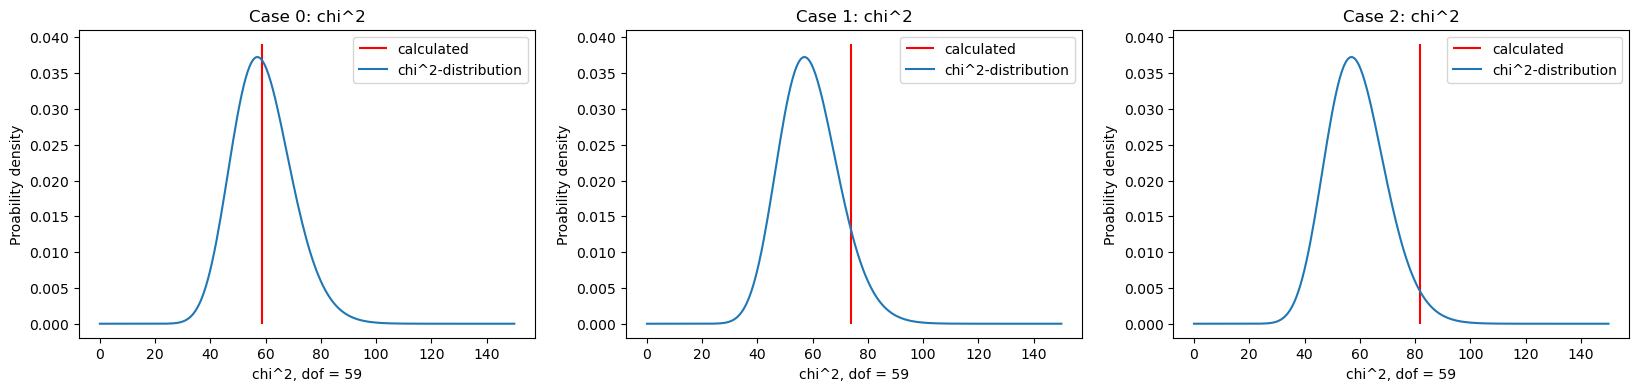

In [10]:
# Read the data and perform the tasks listed above
#
# Save the p-value in the list variable `pvalue`
pvalue = [0., 0., 0.]
x = np.linspace(0, 150, 200)
significance_level = 0.05

# Should the null hypothesis be rejected? Save your answer in the list boolean variable `reject_null`
reject_null = [False, False, False]

fig_signal, axs_signal = plt.subplots(1, 3, figsize=(20, 4))
fig_chi2,   axs_chi2   = plt.subplots(1, 3, figsize=(20, 4))

for icase, amp_annual in enumerate([5., 5., 5.]):
    sigma = amp_annual
    print(f'Read data for case {icase:>2}')
    time, signal = np.loadtxt(f'{DATA_DIR}/problem2_data{icase}.dat',unpack=True)
    
    
    # PLOT SIGNAL
    axs_signal[icase].plot(time, signal)
    axs_signal[icase].set_title(f'Case {icase}: measured data')
    axs_signal[icase].set_xlabel('Time (a.u.)')
    axs_signal[icase].set_ylabel('Signal amplitude (a.u.)')
    

    # CALCULATE CHI2
    mean = np.mean(signal)
    dof = len(signal) - 1  # we use the samples to estimate the mean, removing one degree of fredom
    
    chi2_pdf_expected = scipy.stats.chi2.pdf(x, df=dof)
    chi2 = np.sum(((signal - mean)/sigma)**2)
    
    pvalue[icase] = 1 - scipy.stats.chi2.cdf(chi2, df=dof) # .sf = 1 - .cdf, i.e. prob. of chi2 being greater than the value
    # remember: cdf of random variable X evaluated at x is the probability that X is less than x.
    #           --> 1-cdf(x) = probability that X is larger than x, i.e. probability of seeing chi2 (or higher) given the chi2-distribution
    
    # PLOT CHI2
    axs_chi2[icase].vlines(chi2, 0, 1.05*np.max(chi2_pdf_expected), color='r', label='calculated')
    axs_chi2[icase].plot(x, chi2_pdf_expected, linestyle='-', label='chi^2-distribution')
    axs_chi2[icase].set_title(f'Case {icase}: chi^2')
    axs_chi2[icase].set_xlabel(f'chi^2, dof = {dof}')
    axs_chi2[icase].set_ylabel('Proability density')
    axs_chi2[icase].legend()
    
    if pvalue[icase] < significance_level: #if the prob. of randomly seeing our chi2 value is less than significance level, we reject the null hypothesis
        reject_null[icase] = True

# PRINT
print(f"pvalues: {pvalue}")
print(f"reject_null: {reject_null}")
print("\n")

In [11]:
assert len(reject_null)==3
assert len(pvalue)==3
assert not pvalue==[0.,0.,0.], 'update pvalue list'
assert not reject_null==[False,False,False], 'at least one null hypothesis should be rejected. '+f'{reject_null}'

    Comments (for my own sake):
    * The blue (expected) curve is the theoretical chi2-distribution for the given dof.
    * The red vertical line is the chi2-statics calculated from the given data.
    * The integral of chi2-distribution up to a value x is equal to cdf(x), probability of chi2-distribution giving a value less than x.
    * 1 - cdf(x) is therefore the probability that a randomly drawn sample from the chi2-distribution is greater than the value x.
    * If our calculated chi2-statics is less than significance_level (0.05 = 5 %) we discard the null hypothesis.
    * In other words: if the chance of drawing our chi2-statics from the chi2-distribution happens less than 5 % of the time, we deem the null hypothesis unlikely and discard it in favour of our hypothesis.

## Problem 3: Gaussian Process regression
### (3 points)

In the following we will perform Gaussian Process regression of the [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) ($\mu$) vs. [redshift](https://en.wikipedia.org/wiki/Redshift) ($z$) relation for a simulated set of 100 supernovas.

The data, 
$(z, \mu, \Delta \mu)$,
is generated from an underlying true distribution $p(z) \propto (z/z_0)^2 \exp[(z/z_0)^{1.5}]$ 
with $z_0 = 0.3$. An array with $(z_\mathrm{true}, \mu_\mathrm{true})$ is also available for comparison.

Credit: The data and a part of the problem formulation is obtained from the [AstroML]("http://www.astroml.org/") python module distributed under the 3-clause BSD license. For more information, see http://astroML.github.com.

The `GPy` library is needed to solve this task. You might also need to have `numpy` version >= 1.20. Can be checked by running

In [12]:
import numpy as np
print(np.__version__)

1.21.6


In [13]:
# The GPy library is needed to solve this task
#
import GPy
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# YOUR CODE HERE

### Initialization task
Load the experimental data and the true function data and plot $\mu = \mu(z)$. 

In [14]:
# Load experimental data sample
z_sample, mu_sample, dmu = np.loadtxt(f'{DATA_DIR}/cosmology_sample.dat',unpack=True)

# data must be two-dimensional for GPy
x = z_sample.reshape((-1,1))
y = mu_sample.reshape((-1,1))
print('The experimental data is of shape:', y.shape)

The experimental data is of shape: (100, 1)


In [15]:
# Load true function
z, mu_true = np.loadtxt(f'{DATA_DIR}/cosmology_true.dat',unpack=True)

print('The true function data is of shape:', mu_true.shape)

The true function data is of shape: (1000,)


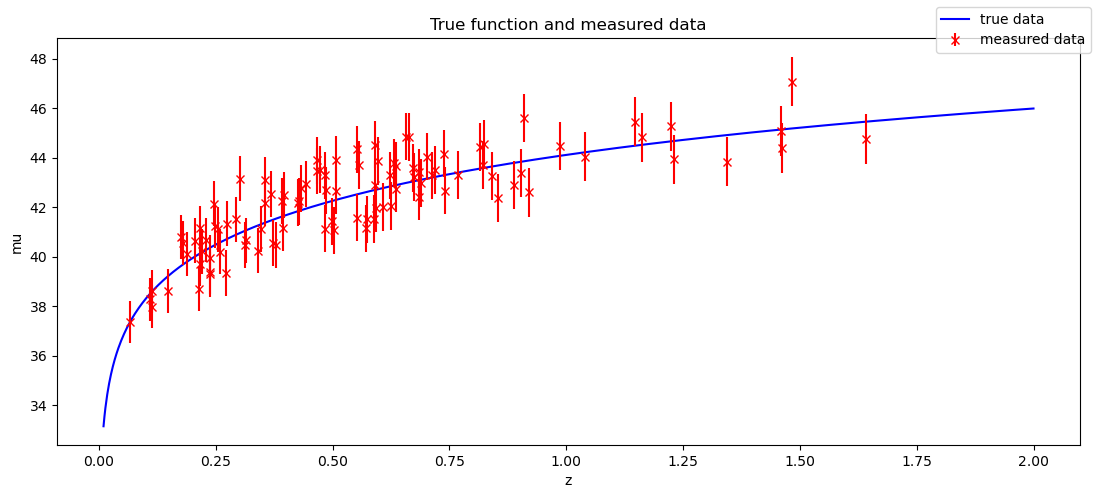

In [16]:
# Plot the data and the true function

fig, ax = plt.subplots(1,figsize=(11,5))
ax.plot(z, mu_true, label='true data', color='b')
ax.set_xlabel('z')
ax.set_ylabel('mu')
ax.set_title('True function and measured data')
ax.errorbar(z_sample, mu_sample, yerr=dmu, label='measured data', marker='x', linestyle='', color='r')
fig.legend()
fig.tight_layout();

### Task 1 
Use the GPy python module to create a GP model with an RBF kernel. The GP model will contain a Gaussian noise term by default. 
* Use the default parameters of the RBF kernel as the initial guess. Print the hyperparameters of the kernel before doing optimization.
* Use GPy to optimize the model hyperparameters to the available data.
* Print the optimized GP model hyperparameters. Check in particular the Gaussian noise variance. Does it make sense given the uncertainites that were present in the experimental data? You can create a markdown cell below your solution where you add your commentary.
* What is the log likelihood of the data with this GP model? (*Hint*: Use the GPy `model.log_likelihood()` function , where `model` is a GPy regression model)
* Plot the GP regression model together with the data (the GPy plot command will by default show the mean prediction and the 95% credibility region).


Initialization: 
Name : GP regression
Objective : 1316.1261625137322
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        

After optimization: 
Name : GP regression
Objective : 152.571703813742
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  1000.2044403112131  |      +ve      |        
  rbf.lengthscale          |  3.0174646003514893  |      +ve      |        
  Gaussian_noise.variance  |  1.0005767169881228  |      +ve      |        

log_likelihood = -152.571703813742
Average noise in the data: 0.9429548917530961 (compare to Gaussian_noise.variance)


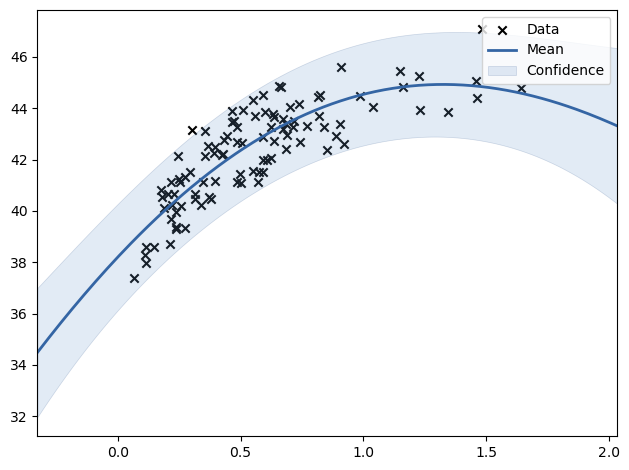

In [17]:
# main reference: https://cforssen.gitlab.io/tif285-book/content/MachineLearning/GP/exercise_GP.html?highlight=gpy

kernel = GPy.kern.RBF(1) #initial guess
GP_model = GPy.models.GPRegression(x, y, kernel)
print("\nInitialization:", GP_model)

GP_model.optimize()
print("\nAfter optimization:", GP_model)

GP_model.plot() #shows 95% confidence

log_likelihood = GP_model.log_likelihood()
print(f"\nlog_likelihood = {log_likelihood}")
print(f"Average noise in the data: {np.mean(dmu)} (compare to Gaussian_noise.variance)")

### COMMENT TASK 1:

    Hyperparameters:

                 Initial guess:
                   variance = 1.0
                   lengthscale = 1.0
                 
                 After optimization:
                   variance = 1000.0
                   lengthscale = 3.02
                   gaussian noise variance = 1.00
                 
                 log_likelihood = -152.6
                 Average noise in the data (one standard deviation): 0.94
                 
    the uncertainty (dmu) in the measured data is close to the value 1.0, so it seems resonable that the gaussian noise variance ( = standard deviation^2 \approx standard deviation for value 1) is 1.0

### Task 2
Repeat the GP model optimization, but initialize the hyperparameters with 
* RBF lengthscale = 1.2
* RBF variance = 1000

From this initial guess, use GPy to optimize the model hyperparameters to the available data.
* Print the optimized GP model hyperparameters. 
* What is the log likelihood of the data with this GP model? 
* Plot the GP regression model together with the data.
* What are the main differences of the fit in Task 2 and the one in Task 1? In particular you should comment on differences in model hyperparameters and any visable consequences in the final GP model. You can create a markdown cell below your solution where you add your commentary.

Initialization: 
Name : GP regression
Objective : 152.23492965367686
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |   value  |  constraints  |  priors
  rbf.variance             |  1000.0  |      +ve      |        
  rbf.lengthscale          |     1.2  |      +ve      |        
  Gaussian_noise.variance  |     1.0  |      +ve      |        

After optimization: 
Name : GP regression
Objective : 151.9135392511997
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  1000.0000119807419  |      +ve      |        
  rbf.lengthscale          |  1.4362310387960264  |      +ve      |        
  Gaussian_noise.variance  |  0.9253990430422042  |      +ve      |        

log_likelihood = -151.9135392511997


 C:\Users\Gottfrid Olsson\anaconda3\envs\tif285-env\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


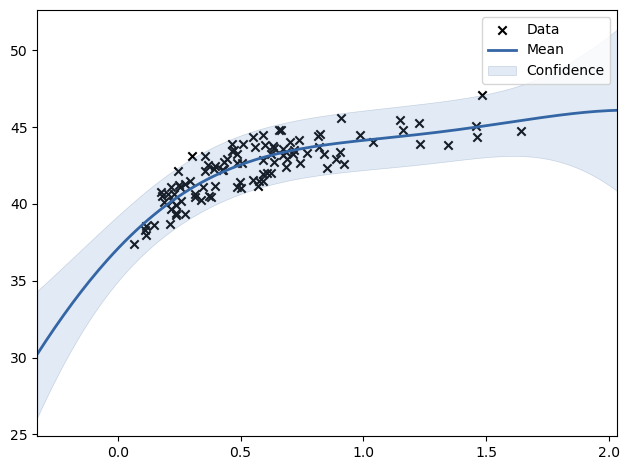

In [18]:
## TASK 2 ##

kernel_2 = GPy.kern.RBF(1, variance=1000.0, lengthscale=1.2) #initial guess
GP_model_2 = GPy.models.GPRegression(x, y, kernel_2)
print("Initialization:", GP_model_2)

GP_model_2.optimize()
print("\nAfter optimization:", GP_model_2)

GP_model_2.plot() #shows 95% confidence

log_likelihood_2 = GP_model_2.log_likelihood()
print(f"\nlog_likelihood = {log_likelihood_2}")

### COMMENT TASK 2:

    Hyperparameters:

                 Initial guess:
                   variance = 1000.0
                   lengthscale = 1.2
                 
                 After optimization:
                   variance = 1000.0
                   lengthscale = 1.436
                   gaussian noise variance = 0.9254
                 
                 log_likelihood = -151.91 (a little bit better than Task 1)
                 average noise in the data: 0.94

    Compared with Task 1:
              * the Gaussian curve points more horizontally to the right (higher z) here
              * the Gaussian noise variance is a bit smaller, and better matches the average noise in the measured data
              *log_likelihood is a bigger (less negative) --> Task 2 gives a larger likelihood for the data than Task 1, 
               meaning the GPy model in Task 2 better describes the data we have measured
       

### Task 3
* Create an array `Xp = numpy.linspace(0.0,2.0,50)[:,None]` to be used for predictions.
* Extract the mean vector and the covariance matrix from your GPy model object, `model`, using the command `mu, C = model.predict(Xp,full_cov=True)`
* Draw 20 samples from the multivariate Gaussian defined by `mu, C`.
* Extract the mean vector and the standard deviation vector of the 20 samples.
* Plot the sampled curves in a figure together with the mean and the $1\sigma$ and $2\sigma$ bands. (*Hint*: Use `alpha=0.3` when plotting the sampled curves in order to make them somewhat transparent).
* How does the result from this finite number of samples compare to the model plot that was produced in Task 2? You can create a markdown cell below your solution where you add your commentary.

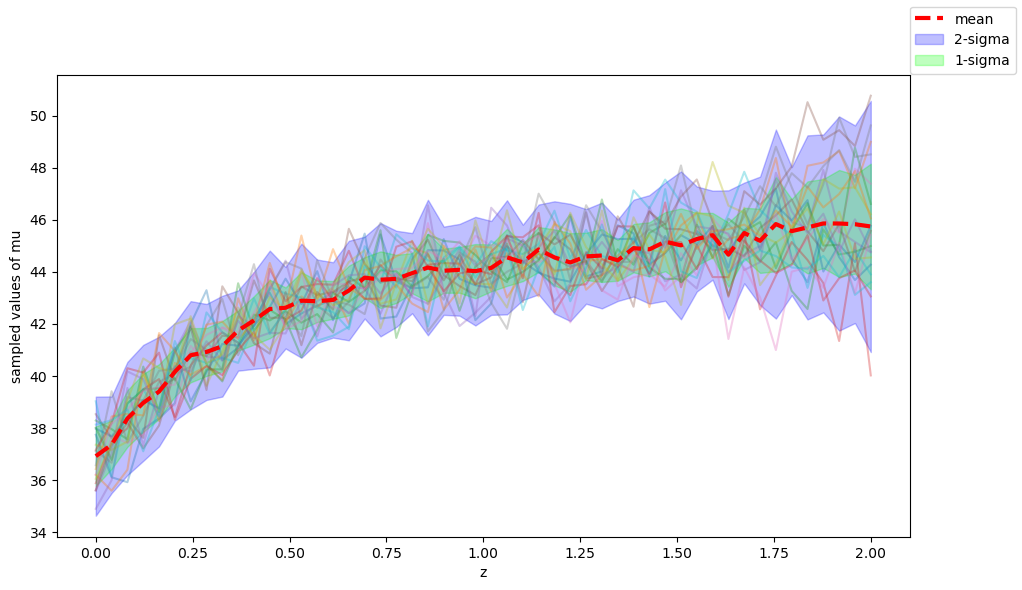

In [19]:
## VARIABLES ##
N = 20
Xp = np.linspace(0.0, 2.0, 50)[:,None]
x= np.linspace(0.0, 2.0, 50)
mu, C = GP_model_2.predict(Xp, full_cov=True)
mu = mu.flatten()


## SAMPLES ##
samples = np.random.multivariate_normal(mu, C, N)
mean_samples  = np.mean(samples, axis=0)
stdev_samples = np.std(samples, axis=0)


## PLOT ##
fig, ax = plt.subplots(figsize=(11, 6))
for i in range(samples.shape[0]):
    ax.plot(x, samples[i,:], alpha=0.35)
ax.plot(x, mean_samples, linestyle='--', color="#FF0000", linewidth=3, label='mean')
ax.fill_between(x, mean_samples-2*stdev_samples, mean_samples+2*stdev_samples, alpha=.25, color='#0000FF', label='2-sigma')
ax.fill_between(x, mean_samples-stdev_samples, mean_samples+stdev_samples, alpha=.25, color='#00FF00', label='1-sigma')
ax.set_xlabel('z')
ax.set_ylabel('sampled values of mu')
fig.legend();

### COMMENT TASK 3:
    compared to Task 2:
    this is more or less the same plot as for Task 2. For these realtively few samples, the mu is overestimated for z
    close to zero (here it is around 37.5 where Task 2 has the 2-sigma (~95%) below 35). 
    These samples show, just as Task 2, that the uncertainty is larger for z around 2 compared to smaller values for z.

## Problem 4: Single neuron classifier
### (3 points)

In [20]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set('talk')

### Background

The Ising model is arguably the most famous model in (condensed matter) physics. It is described by the simple Hamiltonian

$$
H=−J \sum_{\langle i,j \rangle} s_i s_j.
$$

Here, the $s_i=\{−1,1\}$ are classical, binary magnetic moments (spins) sitting on a two-dimensional square lattice and the $\langle i,j \rangle$ indicates that only interactions betweens neighboring spins are taken into account. For simplicity, we will set $J=1$.

Most importantly, the Ising model shows a phase transition between a paramagnetic and a ferromagnetic phase as a function of temperature. The critical temperature $T_c$ at which this change of magnetic character occurs has been calculated exactly by Lars Onsager. He found

$$
T_c = \frac{2}{\log \left( 1 + \sqrt{2} \right) }
$$

In [21]:
Tc = 2 / np.log(1+np.sqrt(2))
print(f"Critical temperature: Tc = {Tc:.4f}")

Critical temperature: Tc = 2.2692


In this problem we aim to reproduce this result (roughly) using a simple binary classifier (single neuron) that you implement yourself.

The classification problem can be made more sophisticated by introducing neural networks with several layers. Results from such an analysis made it all the way into a Nature Physics publication just a few years ago: [Nature Physics (2017) 13, 431–434](https://www.nature.com/articles/nphys4035)

We will start by quickly simulating the Ising model using the Monte Carlo method to obtain representative sets of spin configurations for a bunch of temperatures. 

#### Monte Carlo simulation
The Monte Carlo method for the Ising model is very straightforward: take a random configuration of spins to begin with and propose individual spin flips until you run out of steam. To decide whether a spin should be flipped we use the Metropolis criterium
$$
p=\min \left( 1, e^{-\beta\Delta E} \right)
$$
where $\Delta E = E′−E$ is the energy difference between the new (spin flipped) and the old configuration according to $H$ above and $\beta = 1/T$ is the inverse of the temperature $T$. Since $\Delta E$ only depends on the local environment of the spin to be flipped (nearest neighbors), we can evaluate it locally. 

#### Generate spin configurations and study the phase transition

In the python file attached with this notebook we have the definition of a `Lattice` class which can be used to generate a 2D lattice for `N` spins at a temperature `T`. Here, we simply import the `Lattice` class and use the `step` method to generate a lattice after a few hundred iterations to simulate a thermalization of the lattice. 

At every iteration, we select $N^2$ random points to try a flip attempt. A flip attempt consists of checking the change in energy due to a flip. If it is negative or less than $e^{-E/(k_b T)}$, then perform the flip. After a few steps the lattice with thermalize.



#### *You need the `lattice.py` file in the same directory to get this to work which contains the definition of `Lattice`*


In [22]:
from lattice import Lattice

In [23]:
# Initialize a lattice
lat = Lattice(N=10, T=4.5)

# Make 30 iterations (N**2 spin flip attempts)
for i in range(30):
    lat.step()

print(lat.lattice) # (or even `print lat` to use the convenient repr)

[[ 1 -1  1  1  1  1  1  1  1  1]
 [-1 -1 -1  1  1  1 -1  1 -1  1]
 [ 1 -1 -1  1  1  1  1  1  1  1]
 [ 1 -1 -1 -1 -1 -1  1 -1 -1  1]
 [ 1  1  1 -1 -1 -1 -1 -1  1  1]
 [ 1  1 -1 -1 -1 -1 -1 -1  1  1]
 [ 1  1 -1 -1 -1 -1  1  1  1  1]
 [ 1  1 -1  1  1  1  1  1  1  1]
 [ 1  1  1 -1 -1  1 -1 -1  1  1]
 [ 1  1  1 -1 -1 -1 -1 -1 -1  1]]


#### Illustrate some spin configurations, and plot macroscopic quantities as a function of temperature

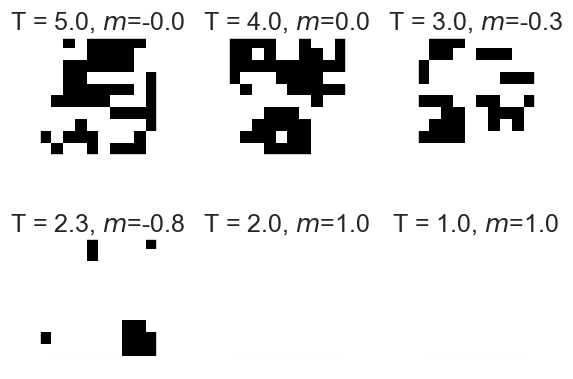

In [24]:
# 10 x 10 lattice
# six temperatures, 500 thermalization iterations
# Plot the spin configurations for varying temperatures.
# Display the magnetization too

nrows, ncols = 2, 3
fig, axs = plt.subplots(nrows, ncols)
fig.subplots_adjust(wspace=0.6)

for (ip, T) in enumerate([5.0, 4.0, 3.0, 2.3, 2.0, 1.0]):
    lat = Lattice(N=10,T=T)
    for k in range(500):
        lat.step()

    idx = ip // ncols, ip % ncols

    axs[idx].matshow(lat.lattice,cmap=plt.cm.gray_r)
    axs[idx].set_title(f"T = {T:.1f}, $m$={lat.get_avg_magnetization():.1f}")

    axs[idx].get_xaxis().set_visible(False)
    axs[idx].get_yaxis().set_visible(False)

In [25]:
# 10 x 10 lattice
# 60 temperatures, 500 thermalization iterations

# For a temperature range, thermalize a lattice, then
# take a few hundred steps, recording energy and magnetization.
# Store the means to plot next.
# This takes about 60s with one modern core.

# Thermalization and measurement steps
ntherm = 500
nmeasure = 200

# points = array with (T, mean(E), abs(mean(M)), var(E))
# with the mean and variance evaluated for a list of many temperatures
points = []
# Storing nmeasure / nsparse data points
nsparse = 10
# points_full = array with (T, E, abs(M))
# for several different configurations per temperature
points_full=[]
for T in np.arange(4.0,1.0,-0.05):
    lat = Lattice(N=10,T=T)
    for _ in range(ntherm):
        lat.step()
    Es = []
    Ms = []

    for istep in range(nmeasure): 
        lat.step()
        Es.append(lat.get_energy())
        Ms.append(lat.get_avg_magnetization())
        if (istep%nsparse==0):
            points_full.append((T,Es[-1],np.abs(Ms[-1])))           
    Es = np.array(Es)
    Ms = np.array(Ms)
    points.append((T,Es.mean(),np.abs(Ms.mean()),Es.var()))
points = np.array(points)
points_full = np.array(points_full)

KeyboardInterrupt: 

In [ ]:
# Plot the energy, magnetization, and heat capacity vs temperature

fig, axs = plt.subplots(3,1,sharex=True,figsize=(8,8))

axs[0].plot(points[:,0],points[:,1], label="E")
axs[0].set_ylabel("Energy")
axs[0].set_title("Energy vs Temperature [L = 10]")

axs[1].plot(points[:,0],points[:,2], label="$|m|$")
axs[1].set_ylabel("$|m|$")
axs[1].set_title("Magnetization vs Temperature [L = 10]")

# heat capacity
# C = var(E) / ( k_B T**2)
heat_capacity = points[:,3] / (points[:,0]**2)
axs[2].plot(points[:,0],heat_capacity, label="$C$")
axs[2].set_xlabel("T")
axs[2].set_ylabel("$C$")
axs[2].set_title("Heat capacity vs Temperature [L = 10]")

for ax in axs:
    ax.axvline(x=Tc,linestyle='-', color="orange",linewidth=2.0, label="$T_c$ ({:.3f})".format(Tc))
    ax.legend(loc="best", numpoints=1)
    ax.grid(True)

#### Energy vs magnetization
Blue data is low temperature ($<T_c$) and red data is high temperature ($>T_c$).

In [ ]:
high_T = points_full[:,0]>Tc
low_T = points_full[:,0]<Tc

E_M_high = points_full[high_T][:,1:]
E_M_low = points_full[low_T][:,1:]

fig, ax = plt.subplots(1,1)
ax.scatter(E_M_high[:,0],E_M_high[:,1],c='r',alpha=0.5,s=25)
ax.scatter(E_M_low[:,0],E_M_low[:,1],c='b',alpha=0.5,s=25)
ax.set_xlabel("$E$")
ax.set_ylabel("$|m|$");

### Task: Single neuron binary classifier

Create a binary classifier that can take $(E,|m|)$ as input data and predict a binary label (0=below Tc, 1=above Tc).

**Hints:**
* Build your own binary classifier from a single neuron. Study the lecture notes and the exercise on logistic regression / neural networks.
* Normalize the data before training / testing (mean=0, standard deviation=1).
* Split into 70 % training data and 30% test data.
* Use weight decay alpha=1.0, learning parameter eta=0.01
* A rather large number of training iterations will be needed.
* Check visually that he final result looks reasonable. Training might lead to the wrong optimum in which case the decision boundary is clearly incorrect.

**How well does it perform? Plot the decision boundary.**

In [26]:
# Create a sigmoid function and a single neuron

# https://cforssen.gitlab.io/tif285-book/content/MachineLearning/NeuralNet/exercises_LogReg_NeuralNet.html

def sigmoid(a):
    '''Sigmoid function with input argument a that is the activation'''
    # https://www.digitalocean.com/community/tutorials/sigmoid-activation-function-python
    return 1/(1+np.exp(-a))


def single_neuron(x, w):
    """
    Single neuron prediction.
    
    Single output and N instances of k independent variables.
    
    Args:
        x (array[float]): input (without bias) to the neuron. x.shape=(N,k) 
        w (array[float]): weights, w.shape=(k+1,)
                          The zero index weight is the bias term.
    Returns:
        y (array[float]): the output of the neuron, y.shape=(k+1,)
    """
    z = w[0] * 1 + x @ w[1:] #activation; bias term + x vector product with the vector of w without first element
    y = sigmoid(z)
    
    return y

In [27]:
assert sigmoid(0.0)==0.5, f'sigmoid(0.0)={sigmoid(0.0)}!=0.5'
assert (sigmoid(np.zeros(3))==0.5*np.ones(3)).all(), f'The sigmoid function should work with arrays'

x=np.array([[0,0],[1,1],[3,2]])
w=np.array([0.,1.,-1.])
output = single_neuron(x, w)
assert np.abs(output[0]-0.5)<0.01, f'output[0] = {output[0]}'


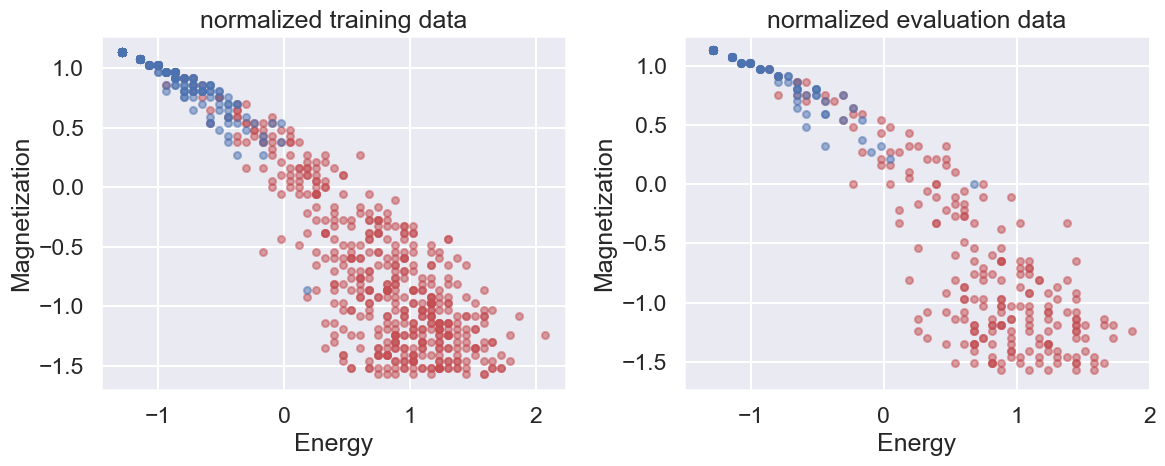

In [28]:
# Split the data and plot
from sklearn.model_selection import train_test_split

# FROM EXTRA PROBLEMS IN PS3
T, E, M = np.loadtxt(f'{DATA_DIR}/problem4_data.dat',unpack=True) #checked: it is the same as points_full above
Tc = 2 / np.log(1+np.sqrt(2))


## CREATE TARGETS ##
#targets is for when "temp > Tc" = 1, and "temp < Tc" = 0
t = np.zeros_like(T)
for i in range(len(t)):
    if T[i]>Tc:
        t[i] = 1 
    
## NORMALIZE ENERGY AND MAGNETIZATION ##
E_mean, E_std = np.mean(E), np.std(E)
E = (E - E_mean) / E_std 

M_mean, M_std = np.mean(M), np.std(M)
M = (M - M_mean) / M_std 

# SPLIT DATA #
t_train, t_val, E_train, E_val, M_train, M_val = train_test_split(t, E, M, train_size=0.7, random_state=42)


# high T is when target "t" (t_train or t_val) is 1 and low T is when t is 0 <--- this is EXACT solution,
 # when we know where the high and low temperature is
high_T_train_indices = np.where(t_train == 1)
low_T_train_indices   = np.where(t_train == 0)

E_train_high = E_train[high_T_train_indices]
E_train_low  = E_train[low_T_train_indices]
M_train_high = M_train[high_T_train_indices]
M_train_low  = M_train[low_T_train_indices]


high_T_val_indices = np.where(t_val == 1)
low_T_val_indices   = np.where(t_val == 0)

E_val_high = E_val[high_T_val_indices]
E_val_low  = E_val[low_T_val_indices]
M_val_high = M_val[high_T_val_indices]
M_val_low  = M_val[low_T_val_indices]


# PLOT #
fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].set_title("normalized training data")
axs[0].scatter(E_train_high, M_train_high, c='r',alpha=0.5,s=25)
axs[0].scatter(E_train_low, M_train_low, c='b',alpha=0.5,s=25)
axs[0].set_xlabel("Energy")
axs[0].set_ylabel("Magnetization")

axs[1].set_title("normalized evaluation data")
axs[1].scatter(E_val_high, M_val_high, c='r',alpha=0.5,s=25)
axs[1].scatter(E_val_low, M_val_low, c='b',alpha=0.5,s=25)
axs[1].set_xlabel("Energy")
axs[1].set_ylabel("Magnetization")
axs[1].set_xlim([-1.5, 2])
axs[1].set_ylim([-1.74, 1.25])
fig.tight_layout();

In [29]:
# Train the single neuron binary classifier
weight_decay_alpha=0.1
eta_learning_rate=0.01

# https://cforssen.gitlab.io/tif285-book/content/MachineLearning/LogReg/LogReg.html?highlight=decay
# decay alpha as:
# alpha*E_W(w) = alpha*(1/2)*sum_j w_j**2   as ridge regularization (keeps parameters from becoming super large)
# calculation done on paper, in the end we should subtract "alpha*w[i]" from the step

def SGD(t, x, w, eta, alpha, epochs):
    """
    Stochastic Gradient Descent for binary classification
    
    N instances of k independent variables
    
    Args:
        t (array[float]): targets, t.shape=(N,) 
        x (array[float]): input (without bias), x.shape=(N,k)
        w (array[float]): weights, w.shape=(k+1,)
                          the zero index weight is the bias term.
           alpha (float): hyperparameter, Ridge regularization 
             eta (float): hyperparameter, learning rate
                  eopchs: number of epochs to evaluate the gradient descent

             
    Returns:
       w* (array[float}): optimized weights
    """
    
    for epoch in range(epochs):

        # 1. RANDOMIZE DATA FOR THIS EPOCH
        randomized_indices = np.random.permutation(range(0, len(t)))
        t_randomized = t[randomized_indices]
        x_randomized = x[randomized_indices]
        
        for n in range(len(t_randomized)):
            t_n = t_randomized[n]
            x_n = x_randomized[n]
            y_n = single_neuron(x_n, w)

        
            # 2. COMPUTE ERROR FOR THIS BATCH
            e_n = t_n - y_n


            # 3. ADJUST WEIGHTS (step in GD)
            # the addition of "-alpha * w[i]" in the step_n_i comes from ridge regularization (calc. done on paper)
            for i in range(len(w)):
                if i == 0:
                    step_n_i = e_n * 1 - alpha * w[i]  # "x_n[0] = 1" if bias is included (it is not, so we write this explicitly)
                else:
                    step_n_i = e_n * x_n[i-1] - alpha * w[i]
                    
                w[i] += eta * step_n_i
        
        if epoch % 50 == 0:
            print(f"epoch {epoch}:", w)
        
    return w


t_train = np.array(t_train)
t_val   = np.array(t_val)

x_train = np.stack([E_train, M_train], axis=1)
x_val   = np.stack([E_val, M_val], axis=1)

k = x_train.shape[1]
w_start = np.zeros((k+1,))

w_star = SGD(t_train, x_train, w_start, eta_learning_rate, weight_decay_alpha, epochs=201) #trained weights for our binary classifier

epoch 0: [ 0.30236834  0.90104314 -0.81577661]
epoch 50: [ 0.38696487  0.99692493 -0.86154472]
epoch 100: [ 0.35849801  0.99714    -0.85727941]
epoch 150: [ 0.34915453  1.00885995 -0.87957611]
epoch 200: [ 0.40167441  0.97268908 -0.84105227]


Evaluate the final binary classifier and plot the 25%, 50%, 75% decision boundaries

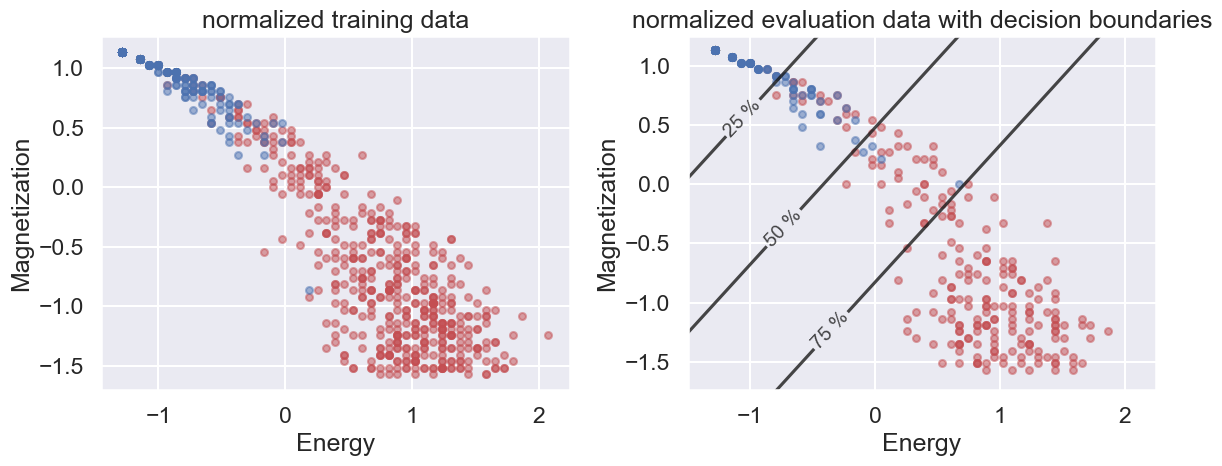

In [30]:
# Evaluate the final binary classifier and plot the 25%, 50%, 75% decision boundaries
y_train = single_neuron(x_train, w_star)
y_val   = single_neuron(x_val, w_star)

# MAKE GRID AND EVALUATE FOR DECISION BOUNDARIES #
X_min, X_max, dX = -5, 5, 0.01
Y_min, Y_max, dY = -5, 5, 0.01
X, Y = np.meshgrid(np.arange(X_min, X_max, dX), np.arange(Y_min, Y_max, dY))
Z = single_neuron(np.c_[X.ravel(), Y.ravel()], w_star) # code borrowed from: https://cforssen.gitlab.io/tif285-book/content/MachineLearning/NeuralNet/exercises_LogReg_NeuralNet.html
Z = Z.reshape(X.shape)


# PLOT #
fig, axs = plt.subplots(1, 2, figsize=(12,5))
countour_levels = [0.25, 0.50, 0.75]

axs[0].set_title("normalized training data")
axs[0].scatter(E_train_high, M_train_high, c='r',alpha=0.5,s=25)
axs[0].scatter(E_train_low, M_train_low, c='b',alpha=0.5,s=25)
axs[0].set_xlabel("Energy")
axs[0].set_ylabel("Magnetization")


axs[1].set_title("normalized evaluation data with decision boundaries")
axs[1].scatter(E_val_high, M_val_high, c='r',alpha=0.5,s=25)
axs[1].scatter(E_val_low, M_val_low, c='b',alpha=0.5,s=25)
C = axs[1].contour(X, Y, Z, levels=countour_levels, colors=['k', 'k', 'k'], alpha=0.8)
axs[1].clabel(C, countour_levels, inline=True, fmt={0.25:"25 %", 0.50:"50 %", 0.75:"75 %"}, fontsize=14, inline_spacing=-14, manual=[(-1, 0.5), (-0.8, -0.3), (-0.1, -1.5)])
axs[1].set_xlabel("Energy")
axs[1].set_ylabel("Magnetization")
axs[1].set_xlim([-1.5, 2.25])
axs[1].set_ylim([-1.74, 1.25])

fig.tight_layout()

Please note that I changed alpha to 0.1 in order for the decision boundaries to be within the frame in the figure.